<a href="https://colab.research.google.com/github/salonisngh/cognitive-computing/blob/main/Case_Study02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Practice** **Case** **Study** – **Hospital** **Resource** **Optimization**

**Scenario**:
 Youʼve been brought in by the administration of a large city hospital facing
increasing strain on its departments. Theyʼve asked your team to audit resource
usage, occupancy trends, and common complaints to help them optimize staff
allocation and room turnover.
 Your task is to identify:
 Which departments are under stress (high occupancy + low staff)
 Where patient experience is suffering (based on complaint patterns)
 And what data-driven decisions can be made for the upcoming budget
meeting
 The dataset provided contains a weekʼs worth of logs across all hospital wards,
including:
 Daily occupancy metrics
 Complaint summaries
 Internal compliance tagging fields not to be analyzed unless mentioned

## **Pandas** - Ward-Level Occupancy Analysis

Load and inspect the data.

In [1]:
import pandas as pd
df=pd.read_csv('/content/hospital_data.csv')
df.to_csv('file.csv',index=False)

df.head()

,ward,day,bed_count,occupancy_rate,issue_log,complaints_summary,ref_code
0,Maternity,Sunday,16,1.14,High patient inflow reported,Suggest training much grow any me own true mag...,QXHH
1,Pediatrics,Thursday,32,1.05,High patient inflow reported,Become show hand line for PM identify decade.,8CGD
2,Maternity,Wednesday,16,0.83,High patient inflow reported,Life deep present person forget teach environm...,I2PC
3,General,Wednesday,16,0.58,High patient inflow reported,According less movement generation against rel...,X5ON
4,General,Monday,22,1.02,Nurse shift not covered properly,Shake identify yard stock to notice.,AQTM


 Find the average occupancy rate per ward.

In [2]:
df_grouped=df.groupby('ward')['occupancy_rate'].mean()
df_grouped

,occupancy_rate
ward,
Emergency,0.7650
General,0.8175
ICU,0.6200
Maternity,1.0920
Pediatrics,0.8100


 Identify wards where occupancy exceeds 1.0 (overload) on average.

In [3]:
overload = df_grouped > 1.0
overload

,occupancy_rate
ward,
Emergency,False
General,False
ICU,False
Maternity,True
Pediatrics,False


## **NumPy**- **Capacity** **Evaluation**

 Extract
occupancy_rate values using NumPy.

In [4]:
import numpy as np
occupancy = df['occupancy_rate'].to_numpy()


Calculate mean, standard deviation, and identify wards 2 std deviations
above average (overburdened)

In [13]:
mean=np.mean(occupancy)
sd= occupancy.std()
print(mean," & ",sd)
threshold=mean+2*sd
critical = df[df['occupancy_rate']>threshold]
print(critical[['ward', 'occupancy_rate']])

0.8584999999999999  &  0.20912376718106435
Empty DataFrame
Columns: [ward, occupancy_rate]
Index: []


# **Matplotlib**- **Visualization**

 Create a bar chart showing average occupancy rate per ward.

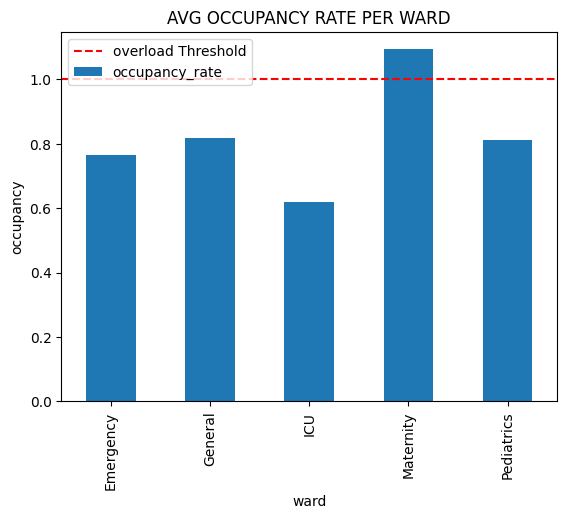

In [19]:
import matplotlib.pyplot as plt

df_grouped.plot(kind='bar',title='AVG OCCUPANCY RATE PER WARD',xlabel='ward',ylabel='occupancy')
plt.axhline(y=1.0,color='r',linestyle='--',label='overload Threshold')
plt.legend()

## **NLP** -**Complaint** **Analysis**

 Read the text file of complaint summaries

In [24]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

with open('incident_notes.txt') as f:
  notes=f.read()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Clean the text (lowercase, punctuation removal, tokenization, stopword
filtering).

In [30]:

tokens=word_tokenize(re.sub(r'[^\w\s]','',notes.lower()))
stop_words=stopwords.words('english')
filtered = [word for word in tokens if word not in stop_words]
filtered

['agent',
 'every',
 'development',
 'say',
 'quality',
 'throughout',
 'beautiful',
 'instead',
 'behavior',
 'discussion',
 'night',
 'respond',
 'red',
 'information',
 'operation',
 'speak',
 'according',
 'south',
 'recently',
 'future',
 'choice',
 'whatever',
 'behavior',
 'benefit',
 'suggest',
 'page',
 'southern',
 'movie',
 'win',
 'need',
 'stop',
 'peace',
 'technology',
 'officer',
 'relate',
 'animal',
 'direction',
 'eye',
 'bag',
 'law',
 'street',
 'class',
 'great',
 'prove',
 'reduce',
 'raise',
 'participant',
 'commercial',
 'rock',
 'clear',
 'writer',
 'policy',
 'news',
 'successful',
 'simply',
 'director',
 'allow',
 'firm',
 'environment',
 'decision',
 'wall',
 'fire',
 'pretty',
 'central',
 'cause',
 'seat',
 'much',
 'section',
 'investment',
 'gun',
 'young',
 'catch',
 'management',
 'sense',
 'technology',
 'check',
 'society',
 'instead',
 'high',
 'wife',
 'team',
 'activity',
 'race',
 'mr',
 'environment',
 'political',
 'born',
 'law',
 'west',
 

Display the 5 most frequently mentioned complaint words

In [31]:
common_words=Counter(filtered).most_common(5)
common_words

[('instead', 3),
 ('behavior', 3),
 ('information', 2),
 ('southern', 2),
 ('technology', 2)]